### Guided Project - Predicting Insurance Costs

For this project we will be working with the medical cost data set from Kaggle. This data set contains information on individual medical insurance bills. We will analyse further using machine learning how these different characteristics relate to the total medical cost. 

We will be using Linear Regression to predict the data.

In [2]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#read the data set
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### Exploratory Data Analysis

In [5]:
#display the rows and the columns of the dataset
insurance.shape

(1338, 7)

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

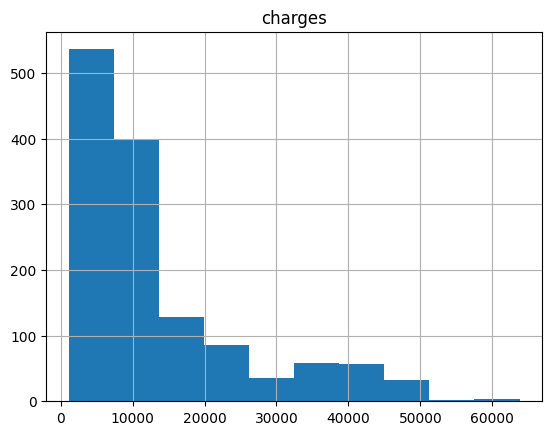

In [7]:
#histogram for the column 'charges'
insurance.hist('charges')

The charges column is slightly skewed and it will be worth it to use the log transformation.

array([[<AxesSubplot:title={'center':'log_charges'}>]], dtype=object)

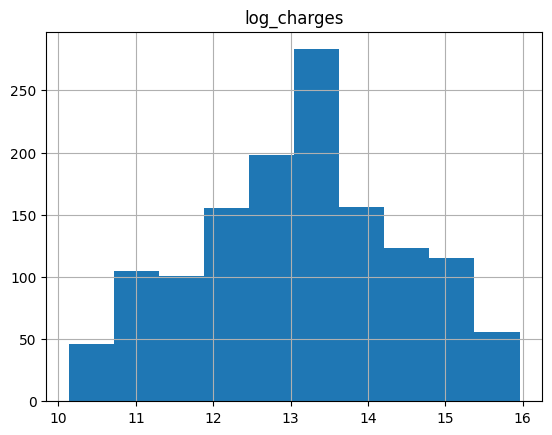

In [8]:
insurance['log_charges'] = np.log2(insurance['charges'])
insurance.hist('log_charges')

In [9]:
#Display the value counts for the 'Smoker' column
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
#Display the value counts for the 'Sex' column
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
#Display the value counts for the 'region' column
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
#convert 'smoker' and 'sex' column to numerical
insurance['smoker_yn'] = insurance['smoker'].apply(lambda x: 1 if x == 'yes' else 0 )
insurance['sex_fm'] = insurance['sex'].apply(lambda x: 1 if x == 'male' else 0 )

In [13]:
#convert 'smoker' and 'region' column to numerical
region_dict = {'southeast': 1,'southwest':2,'northwest':3,'northeast':4}

insurance['region_new'] = insurance['region'].map(region_dict)

In [14]:
#select the numerical data
numerical_cols = insurance.select_dtypes(np.number)

In [15]:
#Display the first 3 rows
numerical_cols.head(3)

,age,bmi,children,charges,log_charges,smoker_yn,sex_fm,region_new
0,19,27.90,0,16884.9240,14.043448,1,0,2
1,18,33.77,1,1725.5523,10.752842,0,1,1
2,28,33.00,3,4449.4620,12.119415,0,1,1


In [16]:
insurance['sex_fm'].value_counts()

1    676
0    662
Name: sex_fm, dtype: int64

In [17]:
#find the correlation
correlation = numerical_cols.corr()
correlation = round(correlation,2)
correlation

,age,bmi,children,charges,log_charges,smoker_yn,sex_fm,region_new
age,1.00,0.11,0.04,0.30,0.53,-0.03,-0.02,0.01
bmi,0.11,1.00,0.01,0.20,0.13,0.00,0.05,-0.26
children,0.04,0.01,1.00,0.07,0.16,0.01,0.02,0.00
charges,0.30,0.20,0.07,1.00,0.89,0.79,0.06,-0.04
log_charges,0.53,0.13,0.16,0.89,1.00,0.67,0.01,0.02
smoker_yn,-0.03,0.00,0.01,0.79,0.67,1.00,0.08,-0.04
sex_fm,-0.02,0.05,0.02,0.06,0.01,0.08,1.00,-0.01
region_new,0.01,-0.26,0.00,-0.04,0.02,-0.04,-0.01,1.00


From the above analysis age has 30% correlation with charges, bmi 20%, smoker_yn 79%. 

<AxesSubplot:>

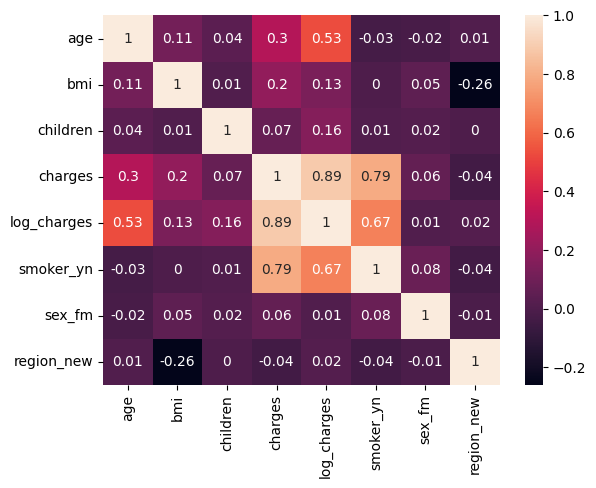

In [18]:
#Display the heatmap
sns.heatmap(correlation, annot = True)

* charges and smoker or non smoker has a high positive correlation.
* charges and age, bmi then have somewhat positive correlation, 0.3 and 0.2

<AxesSubplot:title={'center':'log_charges'}, xlabel='sex'>

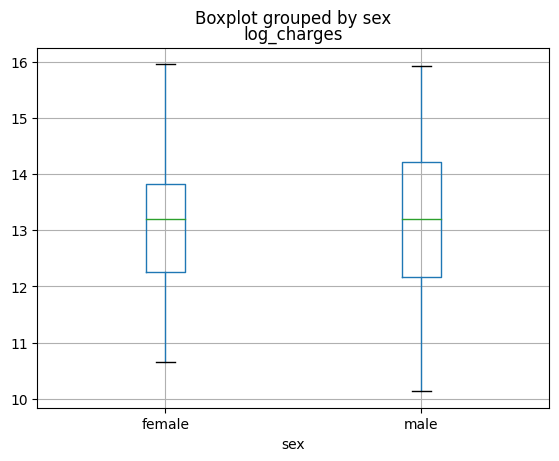

In [19]:
insurance.boxplot(column = ['log_charges'], by ='sex')

<AxesSubplot:title={'center':'log_charges'}, xlabel='smoker'>

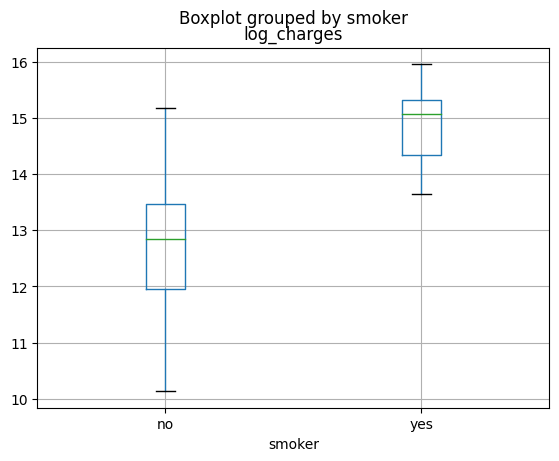

In [20]:
insurance.boxplot(column = 'log_charges', by = 'smoker')

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

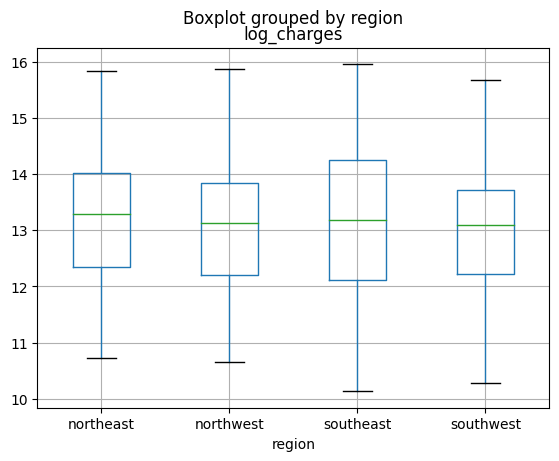

In [21]:
insurance.boxplot(column = 'log_charges', by ='region')

### Build the model

In [22]:
X = numerical_cols.drop('charges', axis = 1)
y = numerical_cols['log_charges']

In [23]:
#splitting the data in to training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 217, test_size = 0.2)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_train)
coefficient = model.coef_
coefficient

array([ 7.27428178e-17, -2.22044605e-16,  1.33573708e-16,  1.00000000e+00,
        4.64038530e-16,  3.42607887e-17, -1.68268177e-16])

In [25]:
#calculate the mean_squared_error
mse_train = mean_squared_error(y_train, y_pred)
print(mse_train)
np.exp(mean_squared_error(y_train, y_pred))

3.4975290975406354e-30


1.0

In [26]:
#calculate the r2_score
r2_score(y_train, pred_train)

NameError: name 'pred_train' is not defined

The training mse for the model is 3.5 and r2 score is 1.0.

### Calculating the Residual

In [ ]:
resi_df = pd.DataFrame()
resi_df['residuals'] = y_train - y_pred
resi_df['fitted'] = y_pred

resi_df.plot.scatter(x = 'fitted', y = 'residuals')

### Interpreting the model

In [ ]:
model.coef_

In [ ]:
intercept = model.intercept_
print(intercept)

### Final model Evaluation

In [ ]:
#checking on the test data
predictions = model.predict(X_test)
mean_squared_error(y_test, predictions)

In [ ]:
np.exp(mean_squared_error(y_test,predictions))

### Conclusion

Test MSE is 3.39 while train MSE is 3.5. The two values are some what close. Therefore we can conclude that the model is not overfit.